# K-Means

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


### Clustering

Los algoritmos cluster son un tipo de machine learning no supervizado encargado de crear agrupaciones de datos. Es decir, se le entrega un conjunto de datos en bruto y el algoritmo de Cluster se encarga de agrupar dependiendo de características. A esto se le llama, espacio de características (feature space).

### K-Means
Los algotimos de k-means son un algoritmo de machine learning no supervizado que tiene como objetivo la clasificación de objetos en grupos o clusters con un centroide.

### Algoritmo:
Primero creamos un conjunto de datos en este caso de 1000 objetos centrados en 6 grupos aleatorios. Para ello se utiliza la librería sklearn. Los datos generados se guardan en la variable 'data'.

In [54]:
data, y_true = make_blobs(n_samples=1000, centroides=6, random_state=6)
plt.scatter(data[:, 0], data[:, 1])

TypeError: make_blobs() got an unexpected keyword argument 'centroides'

Los algoritmos k-means necesitan que se defina una cantidad de clusters para que puedan clasificarse todos los objetos en estos clusters. Para ello, se utliza el algoritmo KMeans de sklearn ajustando los datos creados en 'data' dentro de 6 clusters.

Definimos los 6 Clusters

In [ ]:
clusters = 6

El objetivo es que dada la posición de los objetos, se minimice la distancia entre ellos, de manera que se guarde la información de los objetos cercanos para posteriormente clasificarlos. Para ello se definen vectores de n dimensiones que representan la distancia entre los objetos, tal que iterativamente se minimiza la distancia entre los objetos.

Con esto, se aplica el algoritmo KMeans de sklearn para los clusters = 6 y el conjunto de datos 'data'

In [ ]:
kmeans = KMeans(clusters)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

La librería sklearn permite encontrar los centroides de los clusters de datos de la siguiente manera.

In [ ]:
centroides = kmeans.cluster_centroides_

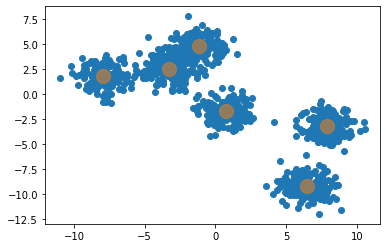

In [ ]:
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(centroides[:, 0], centroides[:, 1], s=200, alpha=0.5)

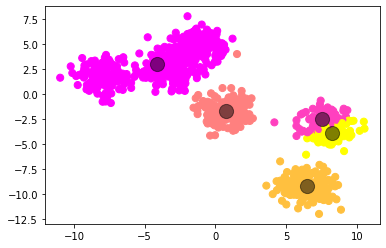

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(data, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(data.shape[0])[:n_clusters]
    centroides = data[i]
    
    while True:
    #for j in range(80):
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(data, centroides)
        
        # 2b. Find new centroides from means of points
        new_centroides = np.array([data[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centroides == new_centroides):
            break
        centroides = new_centroides
    
    return centroides, labels
#sad
centroides, labels = find_clusters(data, 5)
plt.scatter(data[:, 0], data[:, 1], c=labels,s=50, cmap='spring');
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);